In [1]:
import sys
from pathlib import Path

sys.path.append("../")

In [2]:
from entanglement_simulation import EXPERIMENT_DIR
case_b_best_fit = EXPERIMENT_DIR / "case_b_reduced_orbitals_0_3_k3/best_fit/k3.json"

In [3]:
orbitals_to_reduce = [0, 3]
k = 3

In [4]:
# Set up case A
case = "a"
experiment_dir = EXPERIMENT_DIR / f"case_{case}_reduced_orbitals" \
                                  f"_{orbitals_to_reduce[0]}_{orbitals_to_reduce[1]}_k{k}"
experiment_dir.mkdir(exist_ok=True, parents=True)
final_result_dir = experiment_dir / "best_fit/"
final_result_dir.mkdir(exist_ok=True, parents=True)

In [5]:
from qiskit.circuit import Parameter
from entanglement_simulation.data.constants import BITSTRINGS
from entanglement_simulation.scripts.entanglement_forge import reduce_bitstrings
from entanglement_simulation.circuits import hop_gate_2, ansatz_circuit_1

# Prepare ansatz with frozen orbitals
reduced_bitstrings = reduce_bitstrings(BITSTRINGS, orbitals_to_reduce)
print(f"Bitstrings after orbital reduction: {reduced_bitstrings}")
theta = Parameter("θ")
hop_gate = hop_gate_2(theta)
ansatz = ansatz_circuit_1(hop_gate, theta)

Bitstrings after orbital reduction: [[1, 1, 1, 0, 0], [0, 1, 1, 1, 0], [0, 1, 1, 0, 1], [1, 0, 1, 1, 0], [1, 0, 1, 0, 1], [1, 1, 1, 1, 0]]


In [6]:
from entanglement_simulation.utils.experiment_data import ExperimentDataSet
best_case_b_experiment = ExperimentDataSet.from_json(case_b_best_fit)
best_hyperparameters = best_case_b_experiment.hyperparameters

In [7]:
from entanglement_simulation.scripts.entanglement_forge import run_one_entangled_forging_experiment
case_a_result = run_one_entangled_forging_experiment(
    ansatz, best_hyperparameters,
    reduced_bitstrings=reduced_bitstrings,
    target_dir=final_result_dir,
    case=case
)

HyperParameters(k=3, spsa_c0= 15.708, spsa_c1= 0.500, orbitals_to_reduce=[0, 3], initial_thetas=[0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793])
Radius:  0.500; Ground State Energy: -73.86560
Radius:  0.722; Ground State Energy: -75.42486
Radius:  0.944; Ground State Energy: -75.69652
Radius:  1.167; Ground State Energy: -75.65422
Radius:  1.389; Ground State Energy: -75.61523
Radius:  1.611; Ground State Energy: -75.39989
Radius:  1.833; Ground State Energy: -75.29942
Radius:  2.056; Ground State Energy: -75.23154
Radius:  2.278; Ground State Energy: -75.14953
Radius:  2.500; Ground State Energy: -75.31130


In [8]:
from entanglement_simulation.utils.experiment_data import HyperParameters

best_hyperparameters_dict = best_hyperparameters.to_dict()
if "k" in best_hyperparameters_dict:
    best_hyperparameters_dict.pop("k")
best_k6_hyperparameters = HyperParameters(k=6, **best_hyperparameters_dict)
best_k6_result = run_one_entangled_forging_experiment(
    ansatz, best_k6_hyperparameters, reduced_bitstrings=reduced_bitstrings, target_dir=final_result_dir, case=case
)
best_k6_result.to_json(final_result_dir / "k6.json")

HyperParameters(k=6, spsa_c0= 15.708, spsa_c1= 0.500, orbitals_to_reduce=[0, 3], initial_thetas=[0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793])
Radius:  0.500; Ground State Energy: -73.86322
Radius:  0.722; Ground State Energy: -75.42461
Radius:  0.944; Ground State Energy: -75.70146
Radius:  1.167; Ground State Energy: -75.65946
Radius:  1.389; Ground State Energy: -75.61473
Radius:  1.611; Ground State Energy: -75.40823
Radius:  1.833; Ground State Energy: -75.29395
Radius:  2.056; Ground State Energy: -75.23443
Radius:  2.278; Ground State Energy: -75.15037
Radius:  2.500; Ground State Energy: -75.29363


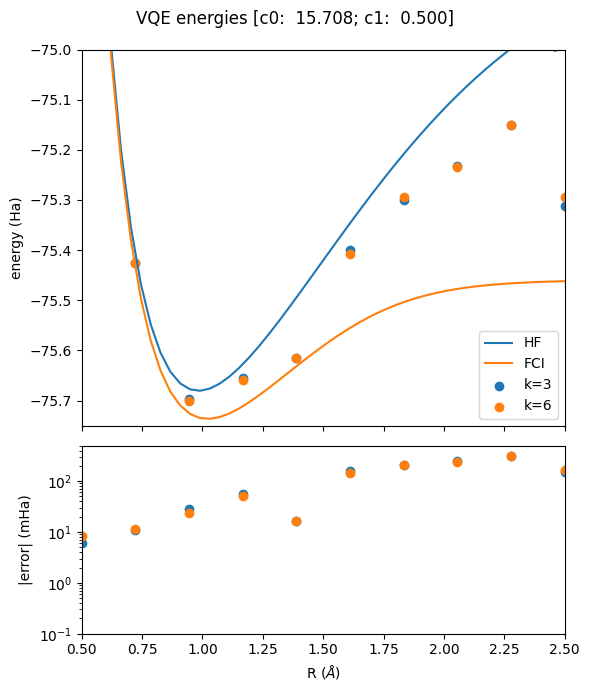

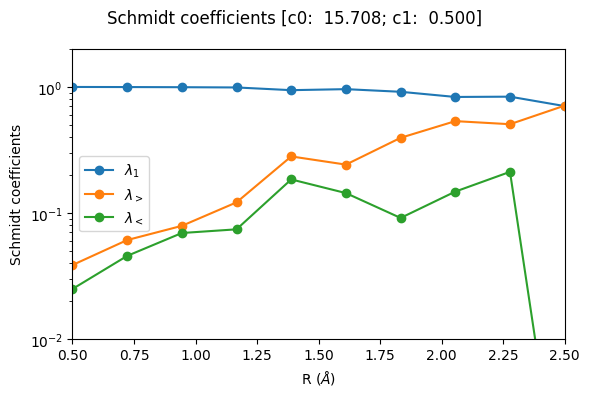

In [9]:
from entanglement_simulation.scripts.make_plots import plot_directory

figures = plot_directory(experiment_dir)

In [10]:
for key, fig in figures.items():
    plot_path = experiment_dir / f"plots/{key}.png"
    figures[key].savefig(plot_path)
    print(f"Figure {key} saved to {plot_path}")

Figure fig_3a saved to /home/ronin/Cloud_Drive/AI_works/Projects/qunasys_assignment/notebooks/../experiments/case_a_reduced_orbitals_0_3_k3/plots/fig_3a.png
Figure fig_4a saved to /home/ronin/Cloud_Drive/AI_works/Projects/qunasys_assignment/notebooks/../experiments/case_a_reduced_orbitals_0_3_k3/plots/fig_4a.png
